# Imports 

In [2]:
import os
import sys

sys.path.append("../src")
FIGS_PATH = "../figs"

import random
import time

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import text_flappy_bird_gym
from IPython.display import clear_output

from agents import BaseAgent

np.random.seed(42)
random.seed(42)

# Baseline

### Random Agent ###


100%|██████████| 100/100 [00:00<00:00, 4002.81it/s]


[]

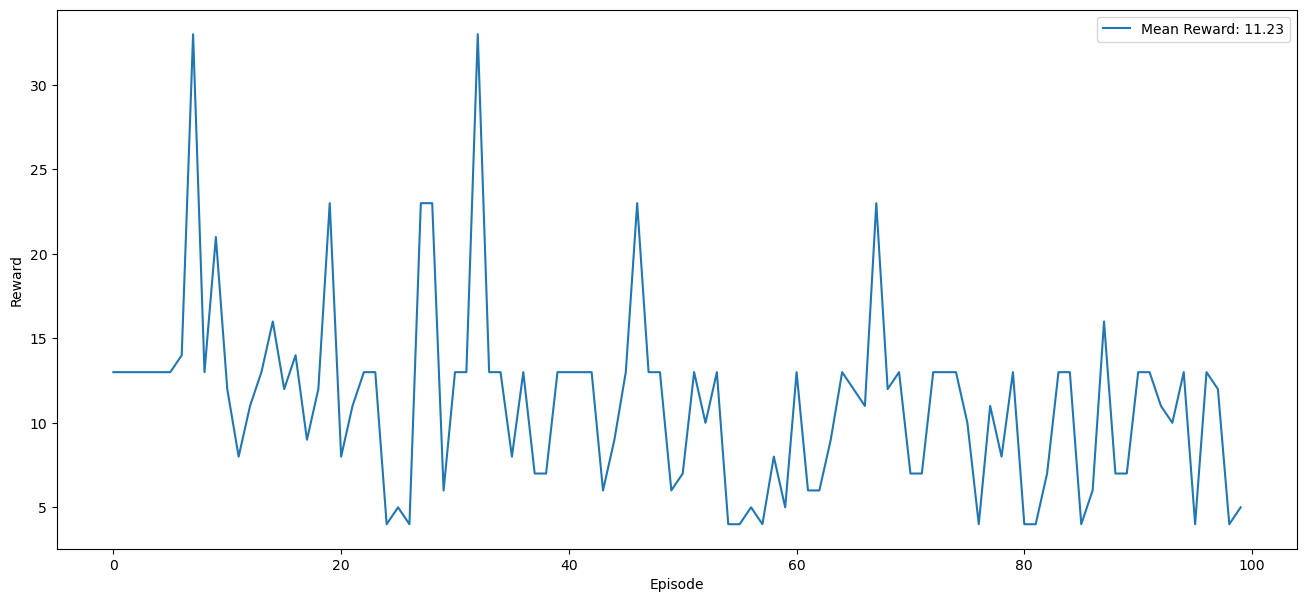

In [4]:
env = gym.make("TextFlappyBird-v0", height=15, width=20, pipe_gap=4)

baseline_agent = BaseAgent(env) 
baseline_rewards = baseline_agent.test(100, 5_000)

plt.figure(figsize=(16, 7))
plt.plot(baseline_rewards, label=f"Mean Reward: {baseline_rewards.mean()}")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.savefig(os.path.join(FIGS_PATH, "baseline-test.png"))
plt.plot()